In [22]:
import csv
import json
import pandas as pd

# Read the file Matches Data set.
def read_csv(src) -> list:
    with open(file=src, newline='') as rawFile:
        reader = csv.reader(rawFile)
        # for row in reader:
        #     print(row)
        x = list(reader)
        # for col in reader:
        #     print(col[0], col[1], col[2], col[4], col[5], col[6], col[7], col[10], col[14])
    return x


def map_string_to_int(s: list) -> object:
    """
    :rtype: list
    """
    temp_dict = {}
    counter = 0
    for item in s:
        if counter > 0 and item in temp_dict:
            continue
        else:
            counter = counter + 1
            temp_dict[item] = counter

    k = []
    for item in s:
        k.append(temp_dict[item])

    return k


def write_csv(x: list) -> object:
    # Write the File in a new Fil
    clean_file = open(r'F:\ASU\IEE_577\Final_Project\test_matches_cleaned.csv', 'w', newline='')
    with clean_file:
        writer = csv.writer(clean_file)
        writer.writerows(x)
    clean_file.close()


def replace_matched_items(word_list, dictionary):
    for lst in word_list:
        for ind, item in enumerate(lst):
            lst[ind] = dictionary.get(item, item)


if "__main__" == __name__:
    matches_list = read_csv(r'F:\ASU\IEE_577\Final_Project\Test_2019_Data.csv')
    # create a team name list
    team_list = []
    city_list = []
    toss_decision_list = []
    for i in range(len(matches_list)):
        if i != 0:
            team_list.append(matches_list[i][4])
            city_list.append(matches_list[i][2])
            toss_decision_list.append(matches_list[i][7])
    var1 = map_string_to_int(team_list)
    var2 = map_string_to_int(toss_decision_list)
    var3 = map_string_to_int(city_list)

    # create a dict for team names
    team_dict = {}
    for i in range(len(team_list)):
        team_dict[team_list[i]] = var1[i]
    # print(team_dict)
    with open(r'F:\ASU\IEE_577\Final_Project\team_dict.json', 'w') as outfile:
        json.dump(team_dict, outfile)

    # create a dict for toss decision

    toss_decision_dict = {}
    for i in range(len(toss_decision_list)):
        toss_decision_dict[toss_decision_list[i]] = var2[i]
    # print(toss_decision_dict)
    with open(r'F:\ASU\IEE_577\Final_Project\toss_decision_dict.json', 'w') as outfile:
        json.dump(toss_decision_dict, outfile)

    # create a dict for city

    city_dict = {}
    for i in range(len(city_list)):
        city_dict[city_list[i]] = var3[i]
    # print(city_dict)
    with open(r'F:\ASU\IEE_577\Final_Project\city_dict.json', 'w') as outfile:
        json.dump(city_dict, outfile)

    # Replace the matches list with values from these dictionaries
    replace_matched_items(matches_list, team_dict)
    replace_matched_items(matches_list, toss_decision_dict)
    replace_matched_items(matches_list, city_dict)

    write_csv(matches_list)


In [56]:
import warnings
warnings.filterwarnings("ignore")

# Train the model

In [2]:
import pandas as pd
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

In [26]:
def predict(home_team, away_team, city, toss_winner, toss_decision):
    matches_cleaned_data = pd.read_csv(r'F:\ASU\IEE_577\Final_Project/matches_cleaned.csv')
    matches_df = matches_cleaned_data[['team1', 'team2', 'city', 'toss_winner', 'toss_decision', 'winner']]

    # Split-out validation dataset
    array = matches_df.values
    x = array[:, 0:5]
    y = array[:, 5]
    validation_size = 0.10
    seed = 7
    x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validation_size,
                                                                                    random_state=seed)

    # Test options and evaluation metric
    knn = DecisionTreeClassifier()
    knn.fit(x_train, y_train)
    results = convert_to_numerical_field(home_team, away_team, city, toss_winner, toss_decision)
    predictions = knn.predict([results])

    team = ''
    if predictions[0] == '6':
        team = 'KKR'
    if predictions[0] == "5":
        team = 'RCB'
    if predictions[0] == "9":
        team = 'CSK'
    if predictions[0] == "10":
        team = 'RR'
    if predictions[0] == "7":
        team = 'DD'
    if predictions[0] == "8":
        team = 'KXIP'
    if predictions[0] == "1":
        team = 'SRH'
    if predictions[0] == "2":
        team = 'MI'

    print("model->" + team)
    if int(predictions) != convert_again(home_team).__int__() and int(predictions) != convert_again(away_team).__int__():
            print("Exception Case")
            winner = convert_to_shortform(calculate_ef_score(home_team, away_team))
            print("EF score data ->" + winner)
            return winner
    else:
        return team.__str__()

In [4]:
def convert_to_shortform(winning_team):
    if winning_team == 'Kolkata':
        return 'KKR'
    if winning_team == "Bangalore":
        return 'RCB'
    if winning_team == "Pune":
        return 'CSK'
    if winning_team == "Jaipur":
        return 'RR'
    if winning_team == "Delhi":
        return 'DD'
    if winning_team == "Dharamshala":
        return 'KXIP'
    if winning_team == "Hyderabad":
        return 'SRH'
    if winning_team == "Mumbai":
        return 'MI'

In [5]:
def convert_again(home_team):
    if home_team == 'Kolkata':
        return 6
    if home_team == "Bangalore":
        return 5
    if home_team == "Pune":
        return 9
    if home_team == "Jaipur":
        return 10
    if home_team == "Delhi":
        return 7
    if home_team == "Dharamshala":
        return 8
    if home_team == "Hyderabad":
        return 1
    if home_team == "Mumbai":
        return 2

In [6]:
def convert_to_numerical_field(home_team, away_team, city, toss_winner, toss_decision):
    list = []
    if home_team == 'Kolkata':
        list.append(6)
    if home_team == "Bangalore":
        list.append(5)
    if home_team == "Pune":
        list.append(9)
    if home_team == "Jaipur":
        list.append(10)
    if home_team == "Delhi":
        list.append(7)
    if home_team == "Dharamshala":
        list.append(8)
    if home_team == "Hyderabad":
        list.append(1)
    if home_team == "Mumbai":
        list.append(2)

    if away_team == "Kolkata":
        list.append(6)
    if away_team == "Bangalore":
        list.append(5)
    if away_team == "Pune":
        list.append(9)
    if away_team == "Jaipur":
        list.append(10)
    if away_team == "Delhi":
        list.append(7)
    if away_team == "Dharamshala":
        list.append(8)
    if away_team == "Hyderabad":
        list.append(1)
    if away_team == "Mumbai":
        list.append(2)

    if city[6:] == "Kolkata":
        list.append(7)
    if city[6:] == "Bangalore":
        list.append(5)
    if city[6:] == "Pune":
        list.append(2)
    if city[6:] == "Jaipur":
        list.append(11)
    if city[6:] == "Delhi":
        list.append(8)
    if city[6:] == "Dharamshala":
        list.append(24)
    if city[6:] == "Hyderabad":
        list.append(1)
    if city[6:] == "Mumbai":
        list.append(6)

    if toss_winner == "KKR":
        list.append(6)
    if toss_winner == "RCB":
        list.append(5)
    if toss_winner == "CSK":
        list.append(9)
    if toss_winner == "RR":
        list.append(10)
    if toss_winner == "DD":
        list.append(7)
    if toss_winner == "KXIP":
        list.append(8)
    if toss_winner == "SRH":
        list.append(1)
    if toss_winner == "MI":
        list.append(2)

    if toss_decision == "Bat":
        list.append(2)
    if toss_decision == "Field":
        list.append(1)
    return list

In [10]:
# prediction from site scrape data
def calculate_ef_score(home, away):
    data = pd.read_csv(r'F:\ASU\IEE_577\Final_Project/_team_rank.csv')
    home_score = list(data.loc[data['Team'] == home]['sum'])
    away_score = list(data.loc[data['Team'] == away]['sum'])
    if home_score > away_score:
        return home
    else:
        return away



In [58]:
matches_cleaned_data = pd.read_csv(r'F:\ASU\IEE_577\Final_Project/matches_cleaned.csv')
matches_df = matches_cleaned_data[['team1', 'team2', 'city', 'toss_winner', 'toss_decision', 'winner']]

# Split-out validation dataset
array = matches_df.values
x = array[:, 0:5]
y = array[:, 5]
validation_size = 0.10
seed = 7
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validation_size,
                                                                                random_state=seed)

# Test options and evaluation metric
knn = DecisionTreeClassifier()
knn.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
def home(home_team):
    
    if home_team == 'Kolkata Knight Riders':
        return 6
    if home_team == "Royal Challengers Bangalore":
        return 5
    if home_team == "Chennai Super Kings":
        return 9
    if home_team == "Rajasthan Royals":
        return 10
    if home_team == "Delhi Capitals":
        return 7
    if home_team == "Kings XI Punjab":
        return 8
    if home_team == "Sunrisers Hyderabad":
        return 1
    if home_team == "Mumbai Indians":
        return 2 
    
def away(away_team):
    
    if away_team == 'Kolkata Knight Riders':
        return 6
    if away_team == "Royal Challengers Bangalore":
        return 5
    if away_team == "Chennai Super Kings":
        return 9
    if away_team == "Rajasthan Royals":
        return 10
    if away_team == "Delhi Capitals":
        return 7
    if away_team == "Kings XI Punjab":
        return 8
    if away_team == "Sunrisers Hyderabad":
        return 1
    if away_team == "Mumbai Indians":
        return 2
    
def cities(city):

    if city == "Kolkata":
        return 7
    if city == "Bengaluru":
        return 5
    if city == "Jaipur":
        return 11
    if city == "Delhi":
        return 8
    if city == "Hyderabad":
        return 1
    if city == "Mumbai":
        return 6
    if city == "Chennai":
        return 9
    if city == "Mohali":
        return 32
    if city == "Visakhapatnam":
        return 26

def toss(toss_winner):
    
    if toss_winner == 'Kolkata Knight Riders':
        return 6
    if toss_winner == "Royal Challengers Bangalore":
        return 5
    if toss_winner == "Chennai Super Kings":
        return 9
    if toss_winner == "Rajasthan Royals":
        return 10
    if toss_winner == "Delhi Capitals":
        return 7
    if toss_winner == "Kings XI Punjab":
        return 8
    if toss_winner == "Sunrisers Hyderabad":
        return 1
    if toss_winner == "Mumbai Indians":
        return 2

def decision(toss_decision):
    if toss_decision == "bat":
        return 2
    if toss_decision == "field":
        return 1

In [101]:
def elf_s(home_team,season):
    
    if home_team == 6 and season == 2008:
        return 0.994
    if home_team == 6 and season == 2009:
        return 0.925
    if home_team == 6 and season == 2010:
        return 1.11
    if home_team == 6 and season == 2011:
        return 1.046
    if home_team == 6 and season == 2012:
        return 1.222
    if home_team == 6 and season == 2013:
        return 0.968
    if home_team == 6 and season == 2014:
        return 1.264
    if home_team == 6 and season == 2015:
        return 0.993
    if home_team == 6 and season == 2016:
        return 1.141
    if home_team == 6 and season == 2017:
        return 1.355
    if home_team == 6 and season == 2018:
        return 1.244
    
    
    if home_team == 5 and season == 2008:
        return 0.924
    if home_team == 5 and season == 2009:
        return 1.228
    if home_team == 5 and season == 2010:
        return 1.228
    if home_team == 5 and season == 2011:
        return 1.191
    if home_team == 5 and season == 2012:
        return 1.126
    if home_team == 5 and season == 2013:
        return 1.185
    if home_team == 5 and season == 2014:
        return 1.063
    if home_team == 5 and season == 2015:
        return 1.341
    if home_team == 5 and season == 2016:
        return 1.436
    if home_team == 5 and season == 2017:
        return 1.03
    if home_team == 5 and season == 2018:
        return 1.088
    

    if home_team == 7 and season == 2008:
        return 1.159
    if home_team == 7 and season == 2009:
        return 1.326
    if home_team == 7 and season == 2010:
        return 1.204
    if home_team == 7 and season == 2011:
        return 0.888
    if home_team == 7 and season == 2012:
        return 1.169
    if home_team == 7 and season == 2013:
        return 0.81
    if home_team == 7 and season == 2014:
        return 0.925
    if home_team == 7 and season == 2015:
        return 1.103
    if home_team == 7 and season == 2016:
        return 1.039
    if home_team == 7 and season == 2017:
        return 1.081
    if home_team == 7 and season == 2018:
        return 1.113
    
    
    if home_team == 2 and season == 2008:
        return 1.227
    if home_team == 2 and season == 2009:
        return 1.101
    if home_team == 2 and season == 2010:
        return 1.37
    if home_team == 2 and season == 2011:
        return 1.192
    if home_team == 2 and season == 2012:
        return 1.227
    if home_team == 2 and season == 2013:
        return 1.305
    if home_team == 2 and season == 2014:
        return 1.156
    if home_team == 2 and season == 2015:
        return 1.286
    if home_team == 2 and season == 2016:
        return 0.977
    if home_team == 2 and season == 2017:
        return 1.388
    if home_team == 2 and season == 2018:
        return 1.109
    
    if home_team == 8 and season == 2008:
        return 1.648
    if home_team == 8 and season == 2009:
        return 1.116
    if home_team == 8 and season == 2010:
        return 1.092
    if home_team == 8 and season == 2011:
        return 1.024
    if home_team == 8 and season == 2012:
        return 1.115
    if home_team == 8 and season == 2013:
        return 1.013
    if home_team == 8 and season == 2014:
        return 1.607
    if home_team == 8 and season == 2015:
        return 0.924
    if home_team == 8 and season == 2016:
        return 0.937
    if home_team == 8 and season == 2017:
        return 1.183
    if home_team == 8 and season == 2018:
        return 1.047
    
    if home_team == 11 and season == 2008:
        return 1.029
    if home_team == 11 and season == 2009:
        return 1.399
    if home_team == 11 and season == 2010:
        return 1.288
    if home_team == 11 and season == 2011:
        return 1.012
    if home_team == 11 and season == 2012:
        return 1.093
    if home_team == 1 and season == 2013:
        return 1.113
    if home_team == 1 and season == 2014:
        return 1.105
    if home_team == 1 and season == 2015:
        return 1.095
    if home_team == 1 and season == 2016:
        return 1.468
    if home_team == 1 and season == 2017:
        return 1.31
    if home_team == 1 and season == 2018:
        return 1.271
    
    if home_team == 9 and season == 2008:
        return 1.296
    if home_team == 9 and season == 2009:
        return 1.077
    if home_team == 9 and season == 2010:
        return 1.408
    if home_team == 9 and season == 2011:
        return 1.189
    if home_team == 9 and season == 2012:
        return 1.305
    if home_team == 9 and season == 2013:
        return 1.327
    if home_team == 9 and season == 2014:
        return 1.425
    if home_team == 9 and season == 2015:
        return 1.362
    if home_team == 9 and season == 2018:
        return 1.381
    
    if home_team == 10 and season == 2008:
        return 1.17
    if home_team == 10 and season == 2009:
        return 1.1
    if home_team == 10 and season == 2010:
        return 1.111
    if home_team == 10 and season == 2011:
        return 0.762
    if home_team == 10 and season == 2012:
        return 1.225
    if home_team == 10 and season == 2013:
        return 1.224
    if home_team == 10 and season == 2014:
        return 1.078
    if home_team == 10 and season == 2015:
        return 0.999
    if home_team == 10 and season == 2018:
        return 1.042
    
    if home_team == 3 and season == 2016:
        return 1.121
    if home_team == 3 and season == 2017:
        return 1.032
    
    if home_team == 4 and season == 2016:
        return 1.024
    if home_team == 4 and season == 2017:
        return 1.354
    if home_team == 14 and season == 2016:
        return 1.024
    if home_team == 14 and season == 2017:
        return 1.354
    
    if home_team == 13 and season == 2011:
        return 0.938
    if home_team == 13 and season == 2012:
        return 0.973
    if home_team == 13 and season == 2013:
        return 0.883
    
    if home_team == 12 and season == 2011:
        return 0.872
 

In [363]:
matches_cleaned_data = pd.read_csv(r'F:\ASU\IEE_577\Final_Project/matches_cleaned1.csv')
data = matches_cleaned_data[['team1', 'team2', 'city', 'toss_winner', 'toss_decision', 'season', 'winner']]

data["ELF_Home"] = data.apply(lambda x: elf_s(x.team1, x.season), axis=1)
data["ELF_Away"] = data.apply(lambda x: elf_s(x.team2, x.season), axis=1)
matches_df.shape
corr = data.drop(['season'], axis = 1)
#matches_df["team1"].value_counts()
#matches_df.shape
#matches_df.to_csv(r'F:\ASU\IEE_577\Final_Project/matches_cleaned1.csv')
#array = matches_df.values
x = data.drop(['winner','season'], axis = 1)
y = data["winner"]
#x["ELF_Home"].isna()
# matches_df = matches_df.drop(['season', 'winner'])
# array = matches_df.values
# x = array[:, 0:7]
validation_size = 0.10
seed = 7
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validation_size,
                                                                               random_state=seed)

# # Test options and evaluation metric

In [326]:
knn = DecisionTreeClassifier()
knn.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [337]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [364]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [246]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
parameters={ 'n_estimators': range(50,150,20),'min_samples_split' : range(10,100,10),'max_depth': range(1,50,2)}
rfc_random = GridSearchCV(rfc,parameters)
rfc_random.fit(x, y)
grid_parm_rfc=rfc_random.best_params_
print("=== BEST PARAMETERS ===")
print(grid_parm_rfc)

#contruct random forest using the best parameters
rfc_best= RandomForestClassifier(**grid_parm_rfc)
rfc_best.fit(x,y)

=== BEST PARAMETERS ===
{'max_depth': 47, 'min_samples_split': 20, 'n_estimators': 130}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=47, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [338]:
rfc_best= RandomForestClassifier(**grid_parm_rfc)
rfc_best.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=47, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [252]:
parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,30,2)}
clf_random = RandomizedSearchCV(knn,parameters,n_iter=20)
clf_random.fit(x, y)
grid_parm_dtc=clf_random.best_params_
print("=== BEST PARAMETERES===")
print(grid_parm_dtc)

#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtc_best = DecisionTreeClassifier(**grid_parm_dtc)
dtc_best.fit(x,y)

=== BEST PARAMETERES===
{'min_samples_split': 40, 'max_depth': 15}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [327]:
dtc_best = DecisionTreeClassifier(**grid_parm_dtc)
dtc_best.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [267]:
search_grid={'n_estimators':[5,10,20, 30, 50],'learning_rate':[0.01,.1]}
abc_random = RandomizedSearchCV(gbc,search_grid,n_iter=20)
abc_random.fit(x, y)
grid_parm_abc=abc_random.best_params_
print(grid_parm_abc)
gbc_best= GradientBoostingClassifier(**grid_parm_abc)
gbc_best.fit(x,y)

{'n_estimators': 50, 'learning_rate': 0.01}


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [359]:
grid_parm_abc = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth':20}
gbc_best= GradientBoostingClassifier(**grid_parm_abc)
gbc_best.fit(x,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=20,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [283]:
from sklearn import svm
from sklearn.svm import LinearSVC
svm_l2 = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=False)
svm_l2.fit(x,y)


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [286]:
gammas = [0.00001,0.001,0.01,0.1,1,10,100]
Cs = [0.01,0.1,1,10,100,1000, 10000]
parameters = { 'C':Cs}
svm_best = GridSearchCV(svm_l2, parameters,return_train_score=True,cv=5)
svm_best.fit(x,y)
grid_parm_svm=svm_best.best_params_
print(grid_parm_svm)
svm_best_l2 = svm.LinearSVC(C = 0.1, penalty='l1', loss='squared_hinge', dual=False)
svm_best_l2.fit(x,y)

{'C': 0.1}


LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [234]:
#import vecstack
from vecstack import stacking
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

models = [ GradientBoostingClassifier(), RandomForestClassifier(), DecisionTreeClassifier() ]
      
S_Train, S_Test = stacking(models,                   
                           x, y, matches_df ,  
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)


task:         [classification]
n_classes:    [15]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingClassifier]
    fold  0:  [0.62777778]
    fold  1:  [0.53409091]
    fold  2:  [0.56725146]
    fold  3:  [0.56804734]
    ----
    MEAN:     [0.57429187] + [0.03378395]
    FULL:     [0.57471264]

model  1:     [RandomForestClassifier]
    fold  0:  [0.51666667]
    fold  1:  [0.48295455]
    fold  2:  [0.45614035]
    fold  3:  [0.47928994]
    ----
    MEAN:     [0.48376288] + [0.02160049]
    FULL:     [0.48419540]

model  2:     [DecisionTreeClassifier]
    fold  0:  [0.45000000]
    fold  1:  [0.34659091]
    fold  2:  [0.40350877]
    fold  3:  [0.42011834]
    ----
    MEAN:     [0.40505451] + [0.03764106]
    FULL:     [0.40517241]



In [165]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [373]:
def elf_sc(home_team,season):
    if home_team == 1 and season == 2019:
        return 1.2
    if home_team == 2 and season == 2019:
        return 1.2
    if home_team == 5 and season == 2019:
        return 1.1
    if home_team == 6 and season == 2019:
        return 1.1
    if home_team == 7 and season == 2019:
        return 1.15
    if home_team == 8 and season == 2019:
        return 1.05567
    if home_team == 9 and season == 2019:
        return 1.381
    if home_team == 10 and season == 2019:
        return 1.042 

In [374]:
#predict('Jaipur', 'Hyderabad', 'City: Jaipur', 'RR', 'Bat')
test_data = pd.read_csv(r'F:\ASU\IEE_577\Final_Project/Test_2019_Data.csv')
matches_df = test_data[['team1', 'team2', 'city', 'toss_winner', 'toss_decision', 'winner','season']]


# Split-out validation dataset
#array = matches_df.values
#x = array[:, 0:5]

# Test options and evaluation metric
# for i in x:
#     results = convert_to_numerical_test_field(i[0], i[1], i[2], i[3], i[4])
#     predictions = knn.predict([results])
#test_data.head()
matches_df.head()
matches_df["Home_Team"]=matches_df["team1"].apply(home)
matches_df["Away_Team"]=matches_df["team2"].apply(away)
matches_df["Match_City"]=matches_df["city"].apply(cities)
matches_df["Toss_Winner"]=matches_df["toss_winner"].apply(toss)
matches_df["Toss_Decision"]=matches_df["toss_decision"].apply(decision)
actual=matches_df["winner"].apply(home)
matches_df["ELF_Home"] = matches_df.apply(lambda x: elf_sc(x.Home_Team, x.season), axis=1)
matches_df["ELF_Away"] = matches_df.apply(lambda x: elf_sc(x.Away_Team, x.season), axis=1)
matches_df=matches_df.drop(['team1', 'team2', 'city', 'toss_winner', 'toss_decision', 'winner','season'], axis = 1)

matches_df.head()


,Home_Team,Away_Team,Match_City,Toss_Winner,Toss_Decision,ELF_Home,ELF_Away
0,5,9,9,9,1,1.10000,1.381
1,1,6,7,6,1,1.20000,1.100
2,7,2,6,2,1,1.15000,1.200
3,8,10,11,10,1,1.05567,1.042
4,7,9,8,7,2,1.15000,1.381


In [322]:
win = knn.predict(matches_df)
win
matches_df["True_Winner"]=actual
matches_df["obtained"]=win

In [334]:
win = rfc.predict(matches_df)
matches_df["True_Winner"]=actual
matches_df["obtained"]=win

In [190]:
win = lr_model.predict(matches_df)
matches_df["True_Winner"]=actual
matches_df["obtained"]=win

In [193]:
win = knc.predict(matches_df)
matches_df["True_Winner"]=actual
matches_df["obtained"]=win

In [375]:
win = gbc.predict(matches_df)
matches_df["True_Winner"]=actual
matches_df["obtained"]=win
matches_df

,Home_Team,Away_Team,Match_City,Toss_Winner,Toss_Decision,ELF_Home,ELF_Away,True_Winner,obtained
0,5,9,9,9,1,1.10000,1.38100,9.0,9
1,1,6,7,6,1,1.20000,1.10000,6.0,1
2,7,2,6,2,1,1.15000,1.20000,7.0,2
3,8,10,11,10,1,1.05567,1.04200,8.0,10
4,7,9,8,7,2,1.15000,1.38100,9.0,9
5,6,8,7,8,1,1.10000,1.05567,6.0,6
6,2,5,5,5,1,1.20000,1.10000,2.0,2
7,10,1,1,10,2,1.04200,1.20000,1.0,1
8,2,8,32,8,1,1.20000,1.05567,8.0,8
9,6,7,8,7,1,1.10000,1.15000,7.0,7


In [340]:
win = rfc_best.predict(matches_df)
matches_df["True_Winner"]=actual
matches_df["obtained"]=win

In [329]:
win = dtc_best.predict(matches_df)
matches_df["True_Winner"]=actual
matches_df["obtained"]=win

In [361]:
win = gbc_best.predict(matches_df)
matches_df["True_Winner"]=actual
matches_df["obtained"]=win

In [288]:
win = svm_best_l2.predict(matches_df)
matches_df["True_Winner"]=actual
matches_df["obtained"]=win

In [362]:
numerator = 0
ind = 0
for i in matches_df["True_Winner"]:
    if i == matches_df["obtained"][ind]:
        numerator +=1
    ind = ind + 1
accuracy = numerator/57
print(numerator)
print(accuracy)

30
0.5263157894736842


In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



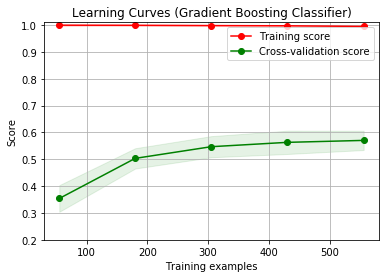

In [314]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
title = "Learning Curves (Gradient Boosting Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, x, y, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.show()

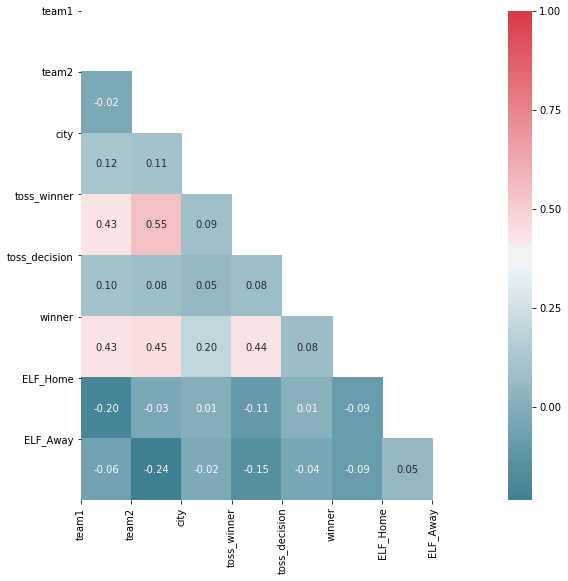

In [313]:
def heatMap(df, mirror):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(9, 9))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot
    
    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
        # Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        # show plot
    plt.show()
heatMap(corr, 'mirror')